In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [182]:
imports_data = pd.read_csv("/kaggle/input/india-trade-data/2018-2010_import.csv")
exports_data = pd.read_csv("/kaggle/input/india-trade-data/2018-2010_export.csv")

In [183]:
imports_data.shape,exports_data.shape

((93095, 5), (137023, 5))

In [184]:
imports_data.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


In [185]:
exports_data.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [186]:
imports_data.describe()

,HSCode,value,year
count,93095.000000,79068.000000,93095.000000
mean,53.849573,63.289855,2014.654740
std,27.567486,666.652363,2.702373
min,1.000000,0.000000,2010.000000
25%,30.000000,0.030000,2012.000000
50%,54.000000,0.380000,2015.000000
75%,78.000000,4.910000,2017.000000
max,99.000000,32781.570000,2018.000000


In [187]:
imports_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93095 entries, 0 to 93094
Data columns (total 5 columns):
HSCode       93095 non-null int64
Commodity    93095 non-null object
value        79068 non-null float64
country      93095 non-null object
year         93095 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB


In [188]:
exports_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
HSCode       137023 non-null int64
Commodity    137023 non-null object
value        122985 non-null float64
country      137023 non-null object
year         137023 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


*from above overview analysis on both imports and exports, we can say that:*
* both imports and exports have 5 features, of which 3 are numerical and 2 are categorical.
* HS code reflects the commodity, in other words HSCode(Harmonized System) is given to the commodity based on internationally standardized system of names and numbers to classify traded products.
* we have trade data from 2010 to 2018.

**lets analyze imports file**

In [189]:
imports_data.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


In [190]:
imports_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93095 entries, 0 to 93094
Data columns (total 5 columns):
HSCode       93095 non-null int64
Commodity    93095 non-null object
value        79068 non-null float64
country      93095 non-null object
year         93095 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB


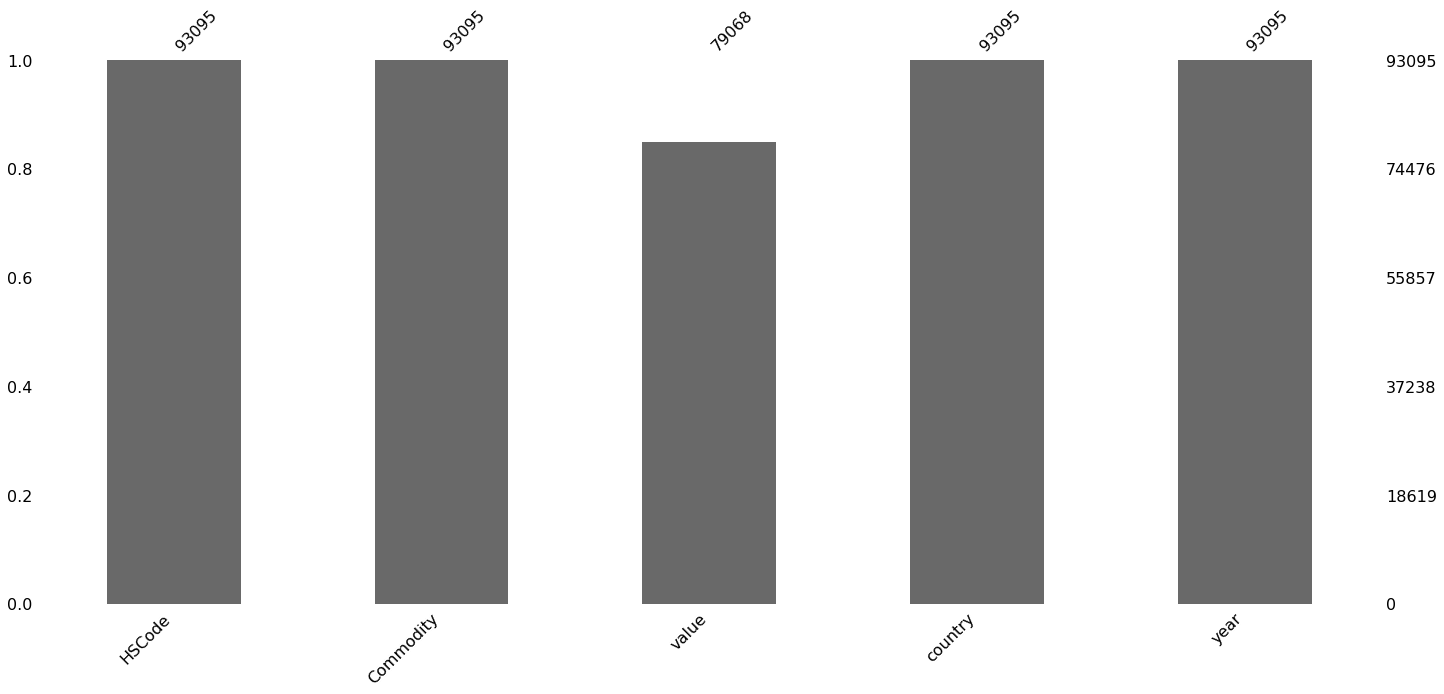

In [191]:
msno.bar(imports_data);

In [192]:
imports_data.describe()

,HSCode,value,year
count,93095.000000,79068.000000,93095.000000
mean,53.849573,63.289855,2014.654740
std,27.567486,666.652363,2.702373
min,1.000000,0.000000,2010.000000
25%,30.000000,0.030000,2012.000000
50%,54.000000,0.380000,2015.000000
75%,78.000000,4.910000,2017.000000
max,99.000000,32781.570000,2018.000000


we have some missing values in value field and there are also value with 0.0 which is strange.

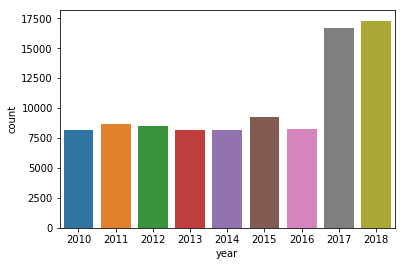

In [193]:
sns.countplot(imports_data['year']);

in 2017 and 2018 imports are almost double, which is quite interesting

In [194]:
imports_data['is_value_null'] = pd.isna(imports_data['value'])

In [195]:
imports_data['value'] = imports_data['value'].fillna(0)

In [196]:
imports_data.head()

,HSCode,Commodity,value,country,year,is_value_null
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018,False
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018,False
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018,False
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018,False
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,0.00,AFGHANISTAN TIS,2018,True


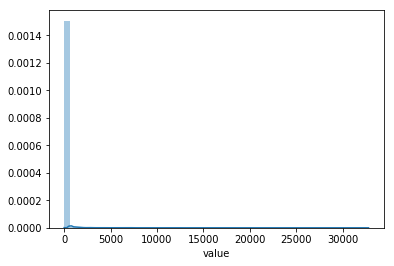

In [197]:
sns.distplot(imports_data['value']);

the reason for above graph being at 1 point is most of the values are less than 5 and only some values are very high which we can see from graph and column description

In [198]:
import_countries = np.unique(imports_data['country'])

In [199]:
len(import_countries)

242

we get imports from 242 countries

# Question: what is mostly imported to India

we can get product name by HSCode, so grouping data by HScode

In [200]:
import_HSCode_countdata= pd.DataFrame(imports_data.groupby(['HSCode'])['HSCode'].count())

In [201]:
import_HSCode_countdata.head()

,HSCode
HSCode,
1,590
2,194
3,518
4,517
5,511


In [202]:
import_HSCode_countdata.shape

(98, 1)

this shows we import 98 different categories

In [203]:
import_HSCode_countdata.columns = ['HSCode_count']

In [204]:
import_HSCode_countdata.head()

,HSCode_count
HSCode,
1,590
2,194
3,518
4,517
5,511


In [205]:
import_HSCode_countdata = import_HSCode_countdata.sort_values(by=['HSCode_count'],ascending=False)

In [206]:
import_HSCode_countdata = import_HSCode_countdata.head(10)

In [207]:
import_HSCode_countdata

,HSCode_count
HSCode,
85,2174
84,2090
39,1866
99,1836
72,1826
90,1739
76,1729
73,1619
74,1518


we found that HSCode with 85 have more imports to India

creating dictionary pointing from HSCode to Commodity

In [208]:
HScode_to_Commodity = pd.DataFrame(imports_data.groupby(['HSCode'])['Commodity'])
HScode_to_Commodity.columns=['HSCode','Commodity']

In [209]:
HScode_to_Commodity_dict = dict(zip(HScode_to_Commodity.HSCode,HScode_to_Commodity.Commodity))
for key in HScode_to_Commodity_dict.keys():
    HScode_to_Commodity_dict[key] = HScode_to_Commodity_dict[key].values[0].replace(',AND',",").replace('AND',",").replace(';',",").replace('.',"")

In [210]:
HScode_to_Commodity_dict[85]#commodities with HSCode of value 85

'ELECTRICAL MACHINERY , EQUIPMENT , PARTS THEREOF, SOUND RECORDERS , REPRODUCERS, TELEVISION IMAGE , SOUND RECORDERS , REPRODUCERS, PARTS'

# Answer: most of the imports to india are ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS

# from which country more products are imported?

In [211]:
import_HSCode_country = imports_data[['HSCode','country']]

In [212]:
import_HSCode_country.head()

,HSCode,country
0,5,AFGHANISTAN TIS
1,7,AFGHANISTAN TIS
2,8,AFGHANISTAN TIS
3,9,AFGHANISTAN TIS
4,11,AFGHANISTAN TIS


In [213]:
imports_HSCode_country_counted = pd.DataFrame(import_HSCode_country.groupby('country')['HSCode'].count())
imports_HSCode_country_counted.columns = ['count_of_products']
imports_HSCode_country_sorted = imports_HSCode_country_counted.sort_values(by=['count_of_products'],ascending=False)

In [214]:
imports_HSCode_country_counted.head()

,count_of_products
country,
AFGHANISTAN TIS,387
ALBANIA,196
ALGERIA,288
AMERI SAMOA,129
ANDORRA,56


# we can see that we have more number of imports from AFGHANISTAN.

# lets see where the Nan and 0 are coming from in value field of imports

In [215]:
import_for_0value = imports_data[imports_data['value']==0.0]

In [216]:
import_for_0value = import_for_0value.drop(['value','is_value_null'],axis=1)

In [217]:
import_for_0value.head()

,HSCode,Commodity,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,AFGHANISTAN TIS,2018
9,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",AFGHANISTAN TIS,2018
10,39,PLASTIC AND ARTICLES THEREOF.,AFGHANISTAN TIS,2018
11,41,RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...,AFGHANISTAN TIS,2018


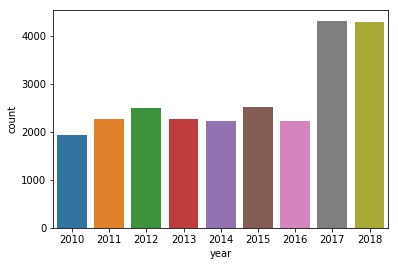

In [218]:
sns.countplot(import_for_0value['year']);

we can see that 20% of the products each year have 0 values.

* OK for now lets leave about value(cost) and find out some facts from data

In [219]:
# what trade makes most money

In [220]:
imports_data_orderedby_value_top25PER = imports_data.sort_values(by=['value'],ascending=False).head(int(0.25*imports_data.shape[0]))

In [221]:
imports_data_orderedby_value_top25PER.shape

(23273, 6)

In [222]:
imports_data_orderedby_value_top25PER.head(20)

,HSCode,Commodity,value,country,year,is_value_null
65604,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",32781.57,SAUDI ARAB,2013,False
83566,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",32188.31,SWITZERLAND,2011,False
74054,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",29896.53,SAUDI ARAB,2012,False
74954,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",29679.47,SWITZERLAND,2012,False
27010,85,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,28672.44,CHINA P RP,2017,False
10039,85,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,28672.44,CHINA P RP,2017,False
82611,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",28302.37,SAUDI ARAB,2011,False
6400,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",24508.68,SAUDI ARAB,2018,False
23371,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",24508.68,SAUDI ARAB,2018,False
57357,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",23212.88,SAUDI ARAB,2014,False


In [223]:
imports_data_top_value = pd.DataFrame(imports_data_orderedby_value_top25PER.groupby('Commodity')['value'].sum()).sort_values(by=['value'],ascending=False)

In [224]:
imports_data_top_value.head(10)

,value
Commodity,
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",1618427.75
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",770537.87
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",427010.94
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",392591.14
ORGANIC CHEMICALS,191905.59
PLASTIC AND ARTICLES THEREOF.,128850.90
IRON AND STEEL,125491.80
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.,115240.07
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",83781.09


we can say following:
* we get  first highest value of imports from minerals,oils etc from saudi, iran etc.
* we get  second highest value of imports from pearls, metals and jewellery, coin etc from switzerland etc.
* we get  third highest value of imports from electrical machinery, electronics and electronic parts etc from china etc.


# now lets analyze exports data

In [225]:
exports_data.head(10)

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018
5,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,25.01,AFGHANISTAN TIS,2018
6,9,"COFFEE, TEA, MATE AND SPICES.",13.75,AFGHANISTAN TIS,2018
7,10,CEREALS.,0.75,AFGHANISTAN TIS,2018
8,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,0.01,AFGHANISTAN TIS,2018
9,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",10.02,AFGHANISTAN TIS,2018


In [226]:
exports_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
HSCode       137023 non-null int64
Commodity    137023 non-null object
value        122985 non-null float64
country      137023 non-null object
year         137023 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


In [227]:
exports_data.describe()

,HSCode,value,year
count,137023.000000,122985.000000,137023.000000
mean,51.330302,21.567829,2014.056304
std,28.018026,229.701279,2.580160
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2012.000000
50%,52.000000,0.360000,2014.000000
75%,74.000000,3.770000,2016.000000
max,99.000000,19805.170000,2018.000000


we can see that for value field, we have null values and 0's

In [228]:
exports_data['is_value_null']=np.isnan(exports_data['value'])

In [229]:
exports_data.head()

,HSCode,Commodity,value,country,year,is_value_null
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018,False
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018,False
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018,False
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018,False
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018,False


In [230]:
exports_data['value'] = exports_data['value'].fillna(0.0)

In [231]:
exports_data.head(10)

,HSCode,Commodity,value,country,year,is_value_null
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018,False
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018,False
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018,False
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018,False
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018,False
5,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,25.01,AFGHANISTAN TIS,2018,False
6,9,"COFFEE, TEA, MATE AND SPICES.",13.75,AFGHANISTAN TIS,2018,False
7,10,CEREALS.,0.75,AFGHANISTAN TIS,2018,False
8,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,0.01,AFGHANISTAN TIS,2018,False
9,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",10.02,AFGHANISTAN TIS,2018,False


In [232]:
(np.sum(exports_data['value']==0.0)/exports_data.shape[0])*100

21.81969450384242

we can see that 21.81% of value fields in exports data have values 0 or declared null

lets see exports data by year

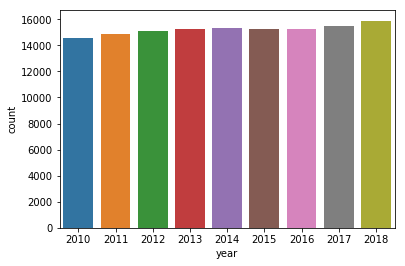

In [233]:
sns.countplot(exports_data['year']);

**there is very slight increase of exports every year**

In [234]:
exports_top10 = pd.DataFrame(exports_data.groupby(['country'])['HSCode'].count()).sort_values(by=['HSCode'],ascending=False).head(10)

In [235]:
list(exports_top10.index)

['U ARAB EMTS',
 'NEPAL',
 'U S A',
 'GERMANY',
 'MALAYSIA',
 'SRI LANKA DSR',
 'U K',
 'SINGAPORE',
 'CHINA P RP',
 'SAUDI ARAB']

**these are the top 10 countries india exports to:

'U ARAB EMTS',
 'NEPAL',
 'U S A',
 'GERMANY',
 'MALAYSIA',
 'SRI LANKA DSR',
 'U K',
 'SINGAPORE',
 'CHINA P RP',
 'SAUDI ARAB'**

In [236]:
exports_data_HSCode = pd.DataFrame(exports_data.groupby(['HSCode'])['HSCode'].count())
exports_data_HSCode.columns=['HSCodeCount']
exports_data_HSCode_top10 = exports_data_HSCode.sort_values(by=['HSCodeCount'],ascending=False).head(10)

In [237]:
exports_data_HSCode_top10

,HSCodeCount
HSCode,
85,1963
84,1945
90,1917
30,1916
62,1907
73,1880
39,1872
87,1866
63,1865


In [238]:
exports_top10_HSCodes = list(exports_data_HSCode_top10.index)

In [239]:
for i in exports_top10_HSCodes:
    print(HScode_to_Commodity_dict[i])
    print("-"*40)

ELECTRICAL MACHINERY , EQUIPMENT , PARTS THEREOF, SOUND RECORDERS , REPRODUCERS, TELEVISION IMAGE , SOUND RECORDERS , REPRODUCERS, PARTS
----------------------------------------
NUCLEAR REACTORS, BOILERS, MACHINERY , MECHANICAL APPLIANCES, PARTS THEREOF
----------------------------------------
OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST , APPARATUS PARTS , ACCESSORIES THEREOF,
----------------------------------------
PHARMACEUTICAL PRODUCTS
----------------------------------------
ARTICLES OF APPAREL , CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED
----------------------------------------
ARTICLES OF IRON OR STEEL
----------------------------------------
PLASTIC , ARTICLES THEREOF
----------------------------------------
VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, , PARTS , ACCESSORIES THEREOF
----------------------------------------
OTHER MADE UP TEXTILE ARTICLES, SETS, WORN CLOTHING , WORN TEXTILE ARTICLES, RAGS
------------

**major exporting products found are electrical products, NUCLEAR REACTORS, BOILERS, MACHINERY , MECHANICAL APPLIANCES,MEDICAL OR SURGICAL INST, ARTICLES OF IRON OR STEEL,PLASTIC, Textiles, MISCELLANEOUS GOODS.**

In [240]:
exports_data_orderedby_value_top10PER = exports_data.sort_values(by=['value'],ascending=False).head(int(0.10*imports_data.shape[0]))

In [241]:
exports_data_top_value = pd.DataFrame(exports_data_orderedby_value_top10PER.groupby('Commodity')['value'].sum()).sort_values(by=['value'],ascending=False)

In [242]:
exports_data_top_value.head(10)

,value
Commodity,
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",431822.78
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",380029.43
"VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.",115901.21
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",115238.58
ORGANIC CHEMICALS,106557.40
PHARMACEUTICAL PRODUCTS,89977.13
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",81799.38
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.",68668.74
IRON AND STEEL,68581.13


these are the most exported products from india by their value

# Lets see what are indian exports and imports value by year

In [243]:
imports_valueByYear = pd.DataFrame(imports_data.groupby(['year'])['value'].sum())
imports_valueByYear = list(imports_valueByYear['value'].values)
exports_valueByYear = pd.DataFrame(exports_data.groupby(['year'])['value'].sum())
exports_valueByYear = list(exports_valueByYear['value'].values)



In [244]:
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018]

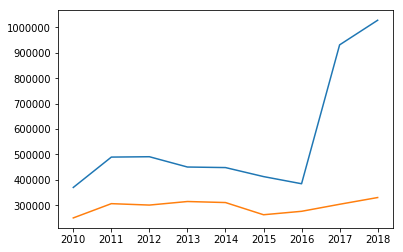

In [245]:
plt.plot(year,imports_valueByYear)
plt.plot(year,exports_valueByYear)
plt.show()

*from the a*bove graph, we can see that india always import 100000 million worth of goods compared to imports but this situation has become more worse in 2017 and 2018 where we are importing 3 times more than what we are exporting, which shows serious Trade Deficit

# after checking results online, it shows imports dataset has wrong data of 2017 and 2018.
